In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy 
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', index_col='Id')

In [3]:
def fill_na(df, feature):       # filling null values based on current distribution
    s = df[feature].value_counts(normalize=True)
    missing = df[feature].isnull()
    df.loc[missing,feature] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [4]:
def prep(df):
    df.MSZoning.fillna('RL',inplace=True)  # mode of this feature is 'RL' , hence filling with this
    df.drop(['Alley'],axis=1,inplace=True) # many are null values, won't be useful
    df.drop(['PoolArea'],axis=1,inplace=True) # 1453/1460 are 0's
    df.MSSubClass.fillna(df.MSSubClass.mean())
    for i in df.columns:
        fill_na(df,i)
        
    df['Bath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
    df['Porch'] = df['OpenPorchSF'] + df['3SsnPorch']  + df['ScreenPorch']
    df.drop(['OpenPorchSF','3SsnPorch','ScreenPorch', 'BsmtFinType2'],axis=1,inplace=True)
    df['GarageYear'] = pd.cut(x=df['GarageYrBlt'], bins=[1900, 1920, 1945, 1980, 1993, 2002, 2010], labels=[0, 1, 2, 3, 4, 5])
    df['HouseYear'] = pd.cut(x=df['YearBuilt'], bins=[1872, 1910, 1950, 1980, 1990, 2002, 2010], labels=[0, 1, 2, 3, 4, 5])
    df.drop(['FullBath', 'HalfBath','BsmtFullBath','BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'YearBuilt'],axis=1,inplace=True)
    df['BsmtFinSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'])/2
    df.drop(['BsmtFinSF1', 'BsmtFinSF2'],axis=1,inplace=True)

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

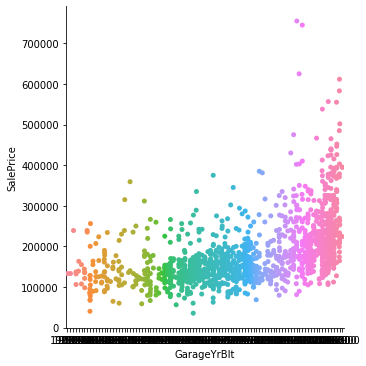

In [5]:
sns.catplot(x='GarageYrBlt',y='SalePrice',data=df)
df.GarageYrBlt.describe() 
#making bins for Garage Year Built

In [6]:
df.value_counts()
# df.LotShape.fillna(df.LotConfig.mode(),inplace=True)
# plt.bar(df.LotConfig,df.SalePrice)

Series([], dtype: int64)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

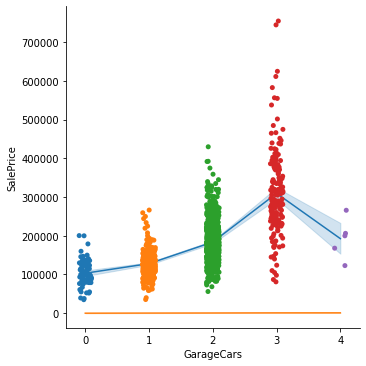

In [7]:
sns.catplot(x='GarageCars',y='SalePrice',data=df)
sns.lineplot(x='GarageCars',y='SalePrice',data=df)
sns.lineplot(x='GarageCars',y='GarageArea',data=df)
#dropping Garage Area and will use Garage Cars for the same, as both represent the same thing

In [8]:
df['Porch'] = df['OpenPorchSF'] + df['3SsnPorch']  + df['ScreenPorch']

In [9]:
from sklearn.linear_model import LinearRegression
sub = df[['OpenPorchSF', '3SsnPorch','ScreenPorch','EnclosedPorch']]
m1 = LinearRegression().fit(sub,df.SalePrice)
m1.score(sub,df.SalePrice)
coef = m1.coef_
inter = m1.intercept_

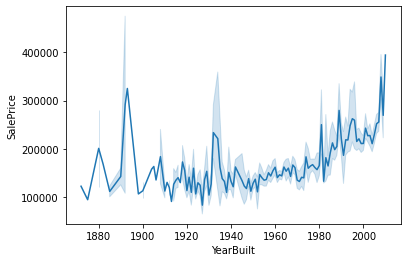

In [10]:
# sns.catplot(x='YearBuilt',y='SalePrice',data=df)
sns.lineplot(x='YearBuilt',y='SalePrice',data=df)
# sns.lineplot(x='YearBuilt',y='GarageArea',data=df)/
df['HouseYear'] = pd.cut(x=df['YearBuilt'], bins=[1872, 1910, 1950, 1980, 1990, 2002, 2010], labels=[0, 1, 2, 3, 4, 5])

In [11]:
df.corr().OverallCond # we can consider dropping this,, less correlation with Sale Price

MSSubClass      -0.059316
LotFrontage     -0.059213
LotArea         -0.005636
OverallQual     -0.091932
OverallCond      1.000000
YearBuilt       -0.375983
YearRemodAdd     0.073741
MasVnrArea      -0.128101
BsmtFinSF1      -0.046231
BsmtFinSF2       0.040229
BsmtUnfSF       -0.136841
TotalBsmtSF     -0.171098
1stFlrSF        -0.144203
2ndFlrSF         0.028942
LowQualFinSF     0.025494
GrLivArea       -0.079686
BsmtFullBath    -0.054942
BsmtHalfBath     0.117821
FullBath        -0.194149
HalfBath        -0.060769
BedroomAbvGr     0.012980
KitchenAbvGr    -0.087001
TotRmsAbvGrd    -0.057583
Fireplaces      -0.023820
GarageYrBlt     -0.324297
GarageCars      -0.185758
GarageArea      -0.151521
WoodDeckSF      -0.003334
OpenPorchSF     -0.032589
EnclosedPorch    0.070356
3SsnPorch        0.025504
ScreenPorch      0.054811
PoolArea        -0.001985
MiscVal          0.068777
MoSold          -0.003511
YrSold           0.043950
SalePrice       -0.077856
Porch            0.017550
Name: Overal

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

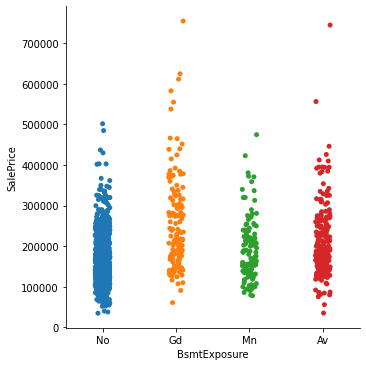

In [12]:
sns.catplot(x='BsmtExposure',y='SalePrice',data=df) # we can drop this
df.BsmtExposure.value_counts()

In [13]:
df['BsmtFinSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'])/2
# df.drop(['BsmtFinSF1', 'BsmtFinSF2'],axis=1,inplace=True)

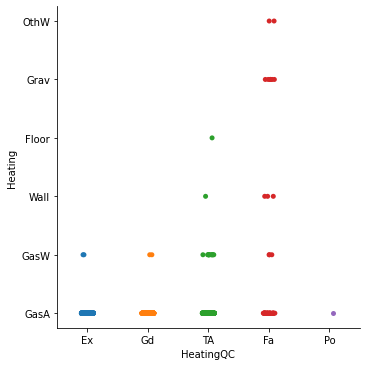

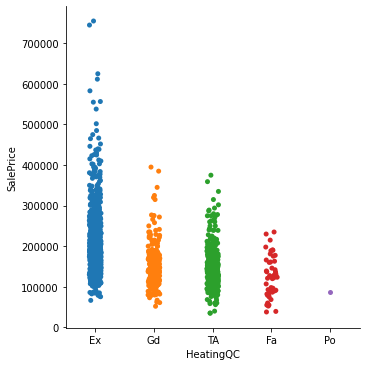

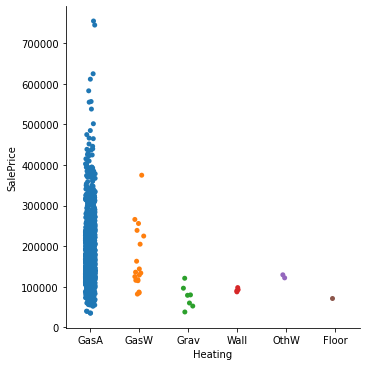

In [14]:
sns.catplot(x='HeatingQC',y='Heating',data=df)
sns.catplot(x='HeatingQC',y='SalePrice',data=df)
sns.catplot(x='Heating',y='SalePrice',data=df)

In [15]:
# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=0)
prep(df)
# y = df['SalePrice']
# df.drop(['SalePrice'],axis=1,inplace=True)
# regr.fit(df, y)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

In [16]:
for i in df.columns:
        fill_na(df,i)

In [53]:
# df.info()

In [18]:
# ordinal  encoding on features that require that treatment, and on rest label encoding , using for loop.

Now we will change the object type to numerical or float/int type. For this I will use label encoding and ordinal encoding, depending on the data description.
Heating --- doubt

can drop "Functional", "GarageCond", "GarageQual", "PavedDrive", "MiscFeature", "SaleType", "Utilities"

In [54]:
# for i in df.columns:
#     if df[i].dtype==np.object:
#         print(df[i].head())

In [20]:
labels = ["MSZoning", "Street", "LotShape", "LandContour", "LotConfig", "Neighborhood","Condition1", "Condition2", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "GarageType", "SaleCondition"]

ordinals = ["LandSlope", "BldgType", "HouseStyle", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "HeatingQC", "Heating", "CentralAir", "Electrical", "KitchenQual", "FireplaceQu", "GarageFinish","GarageQual", "PoolQC","Fence"]

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
label_encoder = preprocessing.LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')


In [55]:
enc_df = pd.DataFrame(enc.fit_transform(df[labels]).toarray())
df1 = df.join(enc_df)
df1.drop(labels, axis=1,inplace=True)
df1.fillna(0, inplace=True) # not sure abbout this

In [59]:
for x in ordinals:
    print(df[x].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA    670
Gd    633
Ex    122
Fa     35
Name: BsmtQual, dtype: int64
TA    1347
Gd      66
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    980
Av    228
Gd    136
Mn    116
Name: BsmtExposure, dtype: int64
Unf    442
GLQ    429
ALQ    224
BLQ    151
Rec    137
LwQ     77
Name: BsmtFinType1, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor   

In [56]:
# df1["LandSlope"] = (pd.DataFrame(label_encoder.fit_transform(df["LandSlope"])).value_counts())
print(df.LandSlope.value_counts())
LS_map = {'Gtl': 0, 'Mod': 1, 'Sev':2}
df1['LandSlope'] = df1['LandSlope'].map(LS_map)

LS_map = {'Unf': 0, 'RFn': 1, 'Fin':2}
df1['GarageFinish'] = df1['GarageFinish'].map(LS_map)

LS_map = {'Gd': 0, 'Fa': 1, 'Ex':2}
df1['PoolQC'] = df1['PoolQC'].map(LS_map)

LS_map = {'MnPrv': 0, 'GdPrv': 1, 'GdWo':2, 'MnWw':3}
df1['Fence'] = df1['Fence'].map(LS_map)

LS_map = {'1Fam': 0, 'TwnhsE': 1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}
df1['BldgType'] = df1['BldgType'].map(LS_map)

LS_map = {'SBrkr': 0, 'FuseA': 1, 'FuseF':2, 'FuseP':3, 'Mix':4}
df1['Electrical'] = df1['Electrical'].map(LS_map)

LS_map = {'Unf': 0, 'GLQ': 1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ': 5}
df1['BsmtFinType1'] = df1['BsmtFinType1'].map(LS_map)

LS_map = {'1Story': 0, '2Story': 1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, '1.5Unf': 5, '2.5Unf':6 , '2.5Fin':7}
df1['HouseStyle'] = df1['HouseStyle'].map(LS_map)

LS_map = {'Fa': 0, 'Gd': 1, 'TA':2, 'Ex':4}
df1['ExterQual'] = df1['ExterQual'].map(LS_map)     # "BsmtQual" , "KitchenQual"

LS_map = {'Fa': 0, 'Gd': 1, 'TA':2, 'Ex':4 , 'Po': 5}
df1['ExterCond'] = df1['ExterCond'].map(LS_map)     # "HeatingQC" , "FireplaceQu" , "GarageQual"

LS_map = {'Fa': 0, 'Gd': 1, 'TA':2,  'Po': 5}
df1['BsmtCond'] = df1['BsmtCond'].map(LS_map)

LS_map = {'Fa': 0, 'No': 1, 'Av':2, 'Gd': 5}
df1['BsmtExposure'] = df1['BsmtExposure'].map(LS_map)

LS_map = {'Y': 0, 'N': 1}
df1['CentralAir'] = df1['CentralAir'].map(LS_map)

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


0    1382
1      65
2      13
Name: LandSlope, dtype: int64

,MSSubClass,LotFrontage,LotArea,Utilities,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,...,119,120,121,122,123,124,125,126,127,128
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,AllPub,Gtl,1Fam,2Story,7,5,2003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20,80.0,9600,AllPub,Gtl,1Fam,1Story,6,8,1976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60,68.0,11250,AllPub,Gtl,1Fam,2Story,7,5,2002,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,70,60.0,9550,AllPub,Gtl,1Fam,2Story,7,5,1970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,60,84.0,14260,AllPub,Gtl,1Fam,2Story,8,5,2000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,AllPub,Gtl,1Fam,2Story,6,5,2000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,20,85.0,13175,AllPub,Gtl,1Fam,1Story,6,6,1988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,70,66.0,9042,AllPub,Gtl,1Fam,2Story,7,9,2006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
